# Boston House Price Prediction 

## Import Required Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
%matplotlib inline 

## Import Dataset 

In [2]:
california_data = fetch_california_housing()
print(california_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
df = pd.DataFrame(california_data.data, columns = california_data.feature_names)
df['Target'] = california_data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### Checking Missing Values

In [4]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

## Exploratory Data Analysis (EDA)

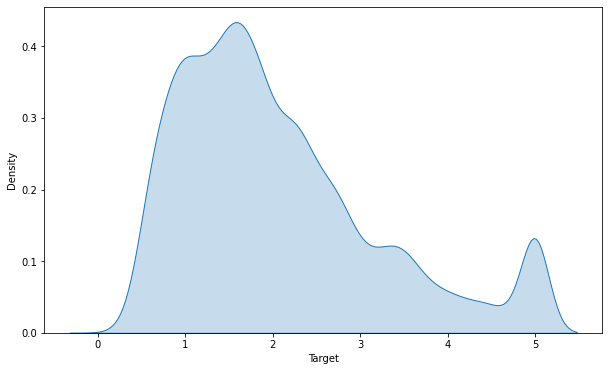

In [5]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Target'],shade=True)
plt.show()

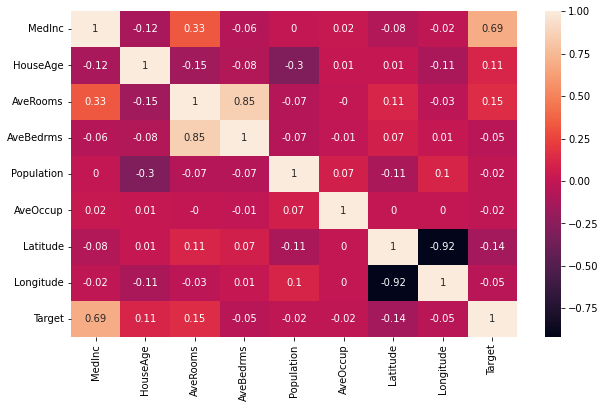

In [6]:
plt.figure(figsize=(10,6))
corr_matrix = df.corr().round(2)
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

### Observations:
> To fit a linear regression model, we select those features which have a high correlation with our target variable 'Target'. By looking at the correlation matrix we can see that 'MedInc' has a strong positive correlation with 'Target' (0.69) where as 'Latitude' has a high negative correlation with 'Target'(-0.14).

> An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features 'AveRooms', 'AveBedrms' have a correlation of 0.85. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features 'Latitude' and 'Longitude' which have a correlation of -0.92.

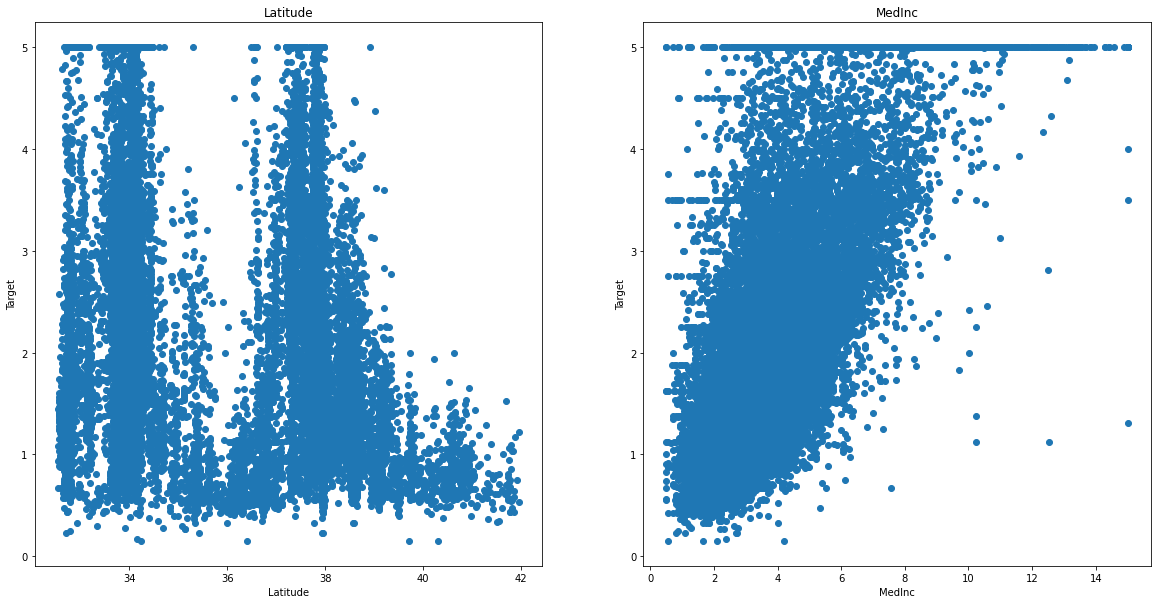

In [7]:
plt.figure(figsize=(20, 10))

features = ['Latitude', 'MedInc']
target = df['Target']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Target')

In [8]:
X = pd.DataFrame(np.c_[df['Latitude'], df['MedInc']], columns = ['Latitude','MedInc'])
Y = df['Target']